In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

In [ ]:
#load the built in dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(df.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1


In [ ]:
#Declaring the best number of clusters for k-means classification
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    clf = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    clf.fit(x)
    wcss.append(clf.inertia_)
    

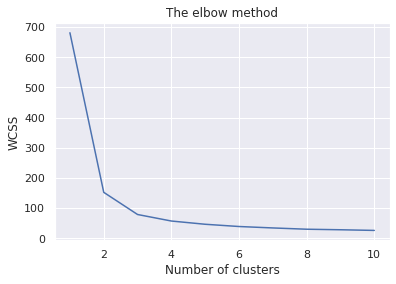

In [ ]:
# Plotting the results onto a line graph
# WCSS == Within cluster sum of squares
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
#Best number of clusters is 3
#Creating the K-means classifier
clf = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y = clf.fit_predict(x)

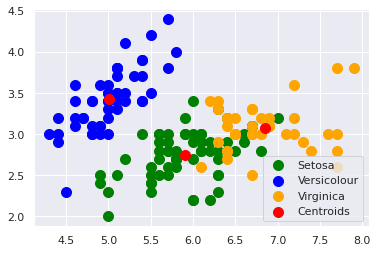

In [ ]:
#Visualising the clusters & it's centroids
plt.scatter(x[y == 0, 0], x[y== 0, 1], s = 100, c = 'green', label = 'Setosa')
plt.scatter(x[y == 1, 0], x[y== 1, 1], s = 100, c = 'blue', label = 'Versicolour')
plt.scatter(x[y == 2, 0], x[y== 2, 1], s = 100, c = 'orange', label = 'Virginica')
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

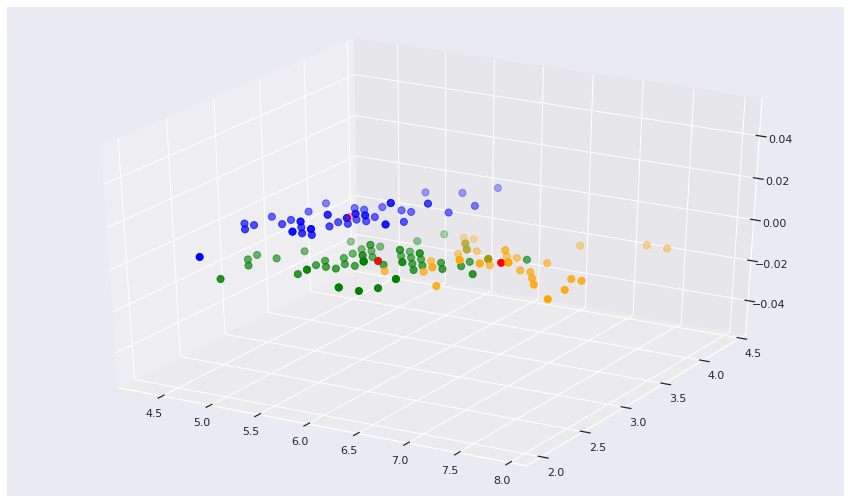

In [ ]:
# Same but 3D
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y == 0, 0], x[y== 0, 1], s = 50, c = 'green', label = 'Setosa')
plt.scatter(x[y == 1, 0], x[y== 1, 1], s = 50, c = 'blue', label = 'Versicolour')
plt.scatter(x[y == 2, 0], x[y== 2, 1], s = 50, c = 'orange', label = 'Virginica')
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

plt.show()

In [ ]:
#Adding labels to iris dataset
labeled_data = df.copy()
labeled_data["Cluster"] = y
print(labeled_data.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  
5        1  
6        1  
7        1  
8        1  


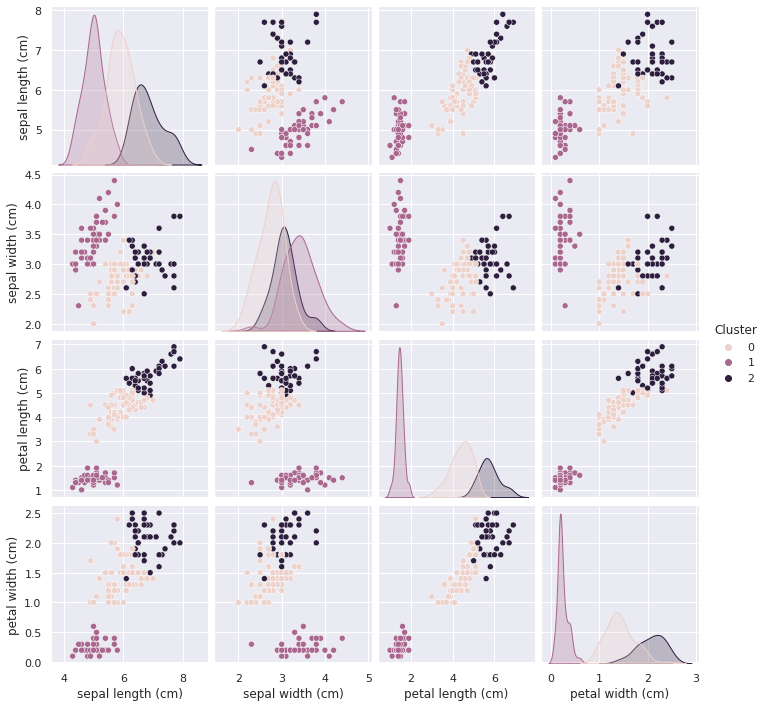

In [ ]:
#Visualizing with Pair plot in order of better understanding
sns.set_style('darkgrid')
sns.pairplot(labeled_data,hue = 'Cluster'); 

In [ ]:
#petal-length and petal-width have a strongpositive correlation(seem to be having a linear relationship).
#Setosa have smallest petal length and petal width compared to others